In [1]:
### 2019 CBP Workshop: "Introduction to Machine Learning"
### M.Ponce / SciNet-UofT

In [1]:
# load functions predefined for this workshop
# it also requires NUMPY and MATPLOTLIB and SKLEARN

import regression as reg

In [26]:
# load python packages: NUMPY and MATPLOTLIB
## if you need to install the following commands in the *SHELL*, try
## $ pip install numpy
## $ pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
# set the graphic mode to 'inline'
%matplotlib inline

In [3]:
# define number of samples for our example
n = 50

In [12]:
# generate some random data
x, y = reg.noisy_data(n)

In [13]:
# generate an uniform "grid" from -1 to 1 with a 100 points
x2 = np.linspace(-1,1, 100)

In [14]:
# fit a polynom of degree=1, ie. a straight line
p1 = np.polyfit(x,y,1)
# evaluate the fit for p1
fit1 = np.poly1d(p1)

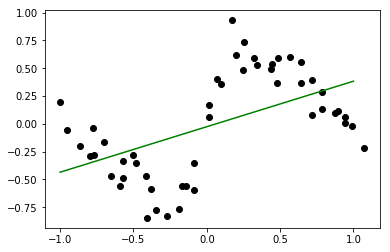

In [15]:
# visualize the data and fit
plt.plot(x,y, 'ko')
plt.plot(x2,fit1(x2), 'g-')

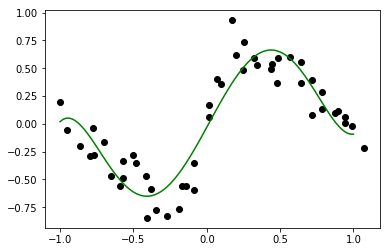

In [27]:
# now let's try a higher degree polynomial...
deg=5
p5 = np.polyfit(x,y, deg)
fit5 = np.poly1d(p5)
# plot the data and new fit
plt.plot(x,y, 'ko')
plt.plot(x2, fit5(x2), 'g-')

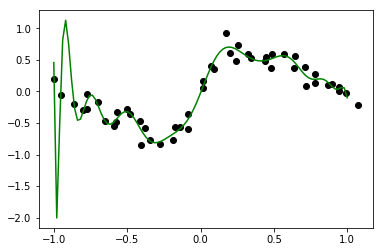

In [28]:
# now let's try a higher degree polynomial...
deg=20
p20 = np.polyfit(x,y, deg)
fit20 = np.poly1d(p20)
# plot the data and new fit
plt.plot(x,y, 'ko')
plt.plot(x2, fit20(x2), 'g-')

In [ ]:
### BIAS vs VARIANCE TRADEOFF

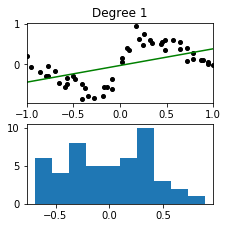

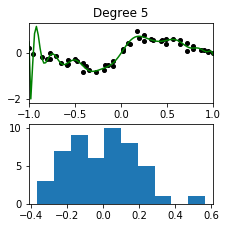

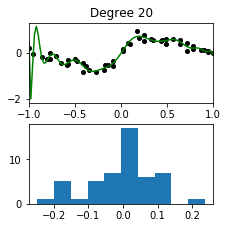

In [29]:
from plot_residuals_hist import *

fit1, res1 = calc_residuals(x,y, 1)
make_hist_plot(x, y, x2, fit1, res1, 1)

fit5, res5 = calc_residuals(x,y, 5)
make_hist_plot(x, y, x2, fit20, res5, 5)

fit20, res20 = calc_residuals(x,y, 20)
make_hist_plot(x, y, x2, fit20, res20, 20)

In [20]:
### RESIDUALS

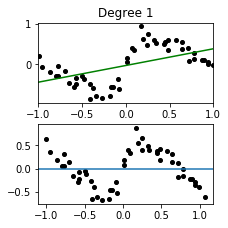

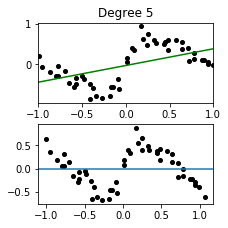

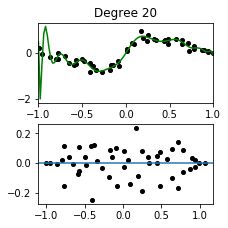

In [30]:
make_res_plot(x, y, x2, fit1, res1, 1)
make_res_plot(x, y, x2, fit1, res1, 5)
make_res_plot(x, y, x2, fit20, res20, 20)

In [24]:
### R2

In [31]:
# load the 'metrics' module from the SKLearn package
## if you need to install SKLEARN, try
## $ pip install sklearn
import sklearn.metrics as skm

In [37]:
skm.r2_score(y,fit1(x))

0.27647633883675493

In [38]:
skm.r2_score(y,fit5(x))

0.8380711087128483

In [39]:
skm.r2_score(y,fit20(x))

0.9581003464443846

In [40]:
### CROSS-VALIDATION ###

In [53]:
%more crossvalidation.py

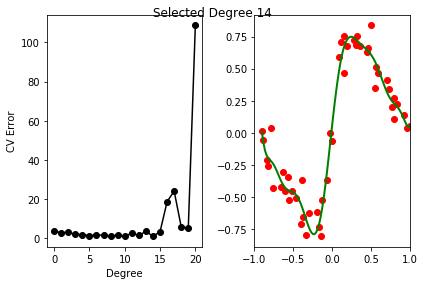

In [45]:
%run crossvalidation.py

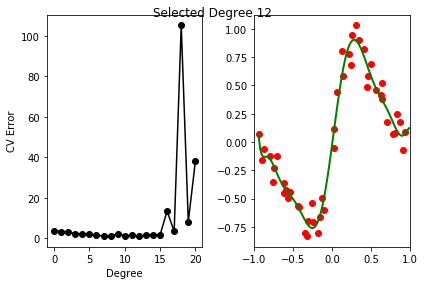

In [51]:
from crossvalidation import *
chooseDegree(50, filename='CV_polynomial20.pdf')

In [54]:
### NON-PARAMETRIC BOOTSTRAPPING

In [56]:
import sklearn.datasets as skd
import numpy.random as npr

In [57]:
dia = skd.load_diabetes()

In [58]:
bmi = dia['data'][:,2]

In [59]:
meds = [np.median(npr.choice(bmi,200))
           for i in range(1000)]

In [60]:
np.mean(meds)

-0.006740010018416236

In [62]:
np.var(meds)

1.4732097442551256e-05

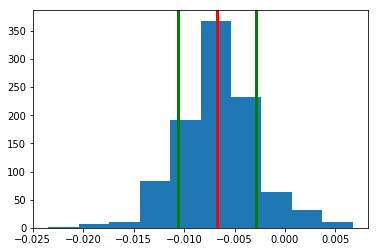

In [65]:
# histogram of medians
plt.hist(meds)
# compute mean value and standar deviation of samples...
mean_meds = np.mean(meds)
std_meds = np.sqrt(np.var(meds))

# add lines for representing mean and SD ranges
plt.axvline(mean_meds, lw=3, color='red')
plt.axvline(mean_meds+std_meds, lw=3, color='green')
plt.axvline(mean_meds-std_meds, lw=3, color='green')

In [66]:
### CLASSIFICATION ###

In [67]:
import sklearn.datasets as skd

In [68]:
import sklearn.model_selection as skms

In [69]:
data0 = skd.load_wine()

In [78]:
print(data0.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [79]:
data = data0.data

In [82]:
# targets represent the type (class) of wine
targets = data0.target

In [83]:
# features are the wines' characteristics (features)
features = data0.feature_names

In [84]:
# split randomly the data set, into training and test data sets
train_x, test_x, train_y, test_y = skms.train_test_split(data, targets, test_size=0.2)

In [89]:
# check the 'shape' (number of entries) in the training data
train_x.shape

(142, 13)

In [88]:
train_y.shape

(142,)

In [90]:
# let's try a DECISION TREE...
import sklearn.tree as skt
import sklearn.metrics as skm

In [91]:
# create the model...
model = skt.DecisionTreeClassifier()

In [92]:
# train the model
model = model.fit(train_x,train_y)

In [93]:
# evalute the model with the training data
pred = model.predict(train_x)

In [94]:
# evalaute results against training data...
skm.accuracy_score(train_y,pred)

1.0

In [97]:
# let's visualize the decission tree
# we will use a package named "pydotplus" to draw our decision tree
# you need to install it using the following command:
# pip install pydotplus
import pydotplus

In [105]:
dot_data = skt.export_graphviz(model, out_file=None,
    class_names=[str(i) for i in np.unique(targets)],
    feature_names = features, impurity=False, filled=True, label='none')

In [106]:
g = pydotplus.graph_from_dot_data(dot_data)

In [112]:
g.write_jpg("wine_tree.png")

True

In [118]:
# Confusion Matrix
# the "Confusion Matrix" tells us whether missclassification happened
# Usually "true" classifications are on the rows and predictions are on the columns
skm.confusion_matrix(train_y,pred)

array([[47,  0,  0],
       [ 0, 58,  0],
       [ 0,  0, 37]])

In [119]:
# The REAL question is how does the model, in this case the decision tree,
# do on the TEST data; ie. data that the model has not "seen" yet

# let's start by evluating (predicting) the model on the test data
test_pred = model.predict(test_x)

In [120]:
# compute the confusion matrix on the test data
skm.confusion_matrix(test_y,test_pred)

array([[12,  0,  0],
       [ 0, 11,  2],
       [ 0,  2,  9]])

In [121]:
# and its accuracy
skm.accuracy_score(test_y,test_pred)

0.8888888888888888

In [127]:
### CLUSTERING ALGORITHMS ###

In [132]:
## Nearest Neighbours: k-NN

In [136]:
# let's take a look at the script "knndemo.py"
% more knndemo.py

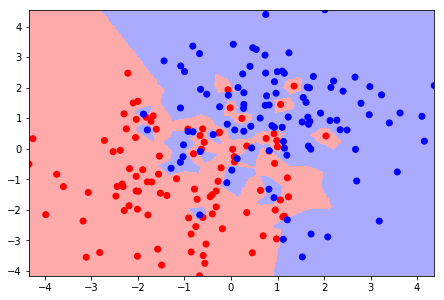

In [124]:
# try running directly the script...
% run knndemo.py

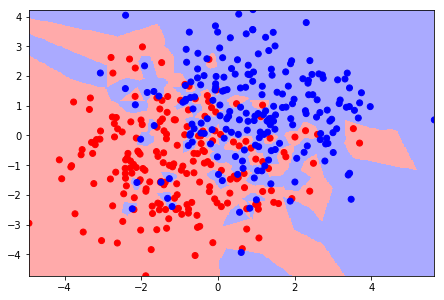

In [140]:
# or just import it and test the main function: 
from knndemo import *
knnplot(num = 200, c1 = -1., sigma1 = 1.5, c2 = 1., sigma2 = 1.5, k = 1)

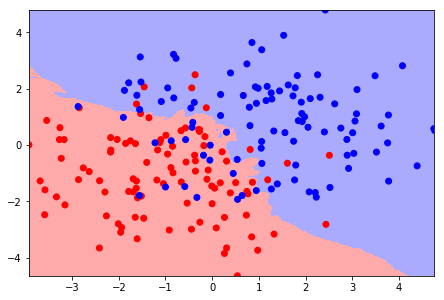

In [142]:
# try different k-values...
knnplot(num = 200, c1 = -1., sigma1 = 1.5, c2 = 1., sigma2 = 1.5, k = 3)

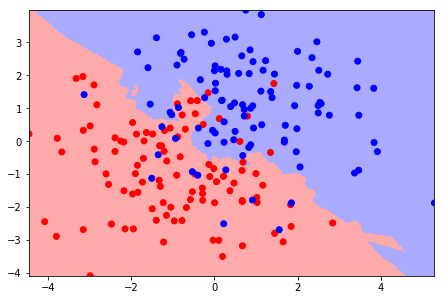

In [143]:
knnplot(num = 200, c1 = -1., sigma1 = 1.5, c2 = 1., sigma2 = 1.5, k = 7)

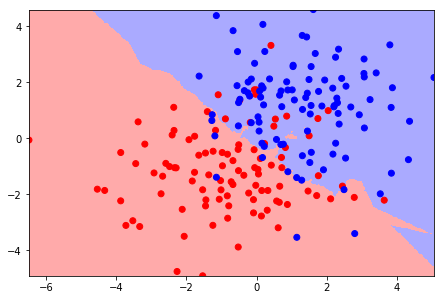

In [144]:
knnplot(num = 200, c1 = -1., sigma1 = 1.5, c2 = 1., sigma2 = 1.5, k = 13)

In [145]:
## Cross-Validation and kNN

In [146]:
import sklearn.datasets as skd

In [147]:
import sklearn.preprocessing as skp

In [149]:
# we will use the famous "iris" data set
iris = skd.load_iris()

In [151]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [153]:
# Split data into 'features' and 'targets'...
# we will also "scale" the data
x = skp.scale(iris.data)
y = iris.target

In [154]:
# check dimensions
x.shape

(150, 4)

In [156]:
# check the features...
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [158]:
# iris' species: targets...
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [160]:
# let's bring the SKL tools...
import sklearn.neighbors as skn
import sklearn.model_selection as skms

In [161]:
# let's try several k-values...
kvalues = range(1,43,2)
scores = np.zeros(len(kvalues))

In [163]:
# let's create a KNeighborsClassifier object (model)...
for i ,k in enumerate(kvalues):
    model = skn.KNeighborsClassifier(k)
    scores[i] = np.mean(skms.cross_val_score(model, x,y, cv=10))

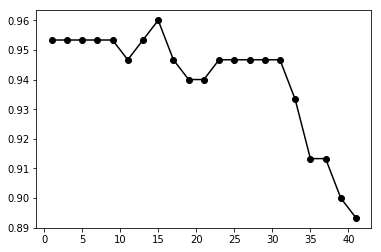

In [164]:
# visualize the results...
plt.plot(kvalues, scores, 'ko-')

In [166]:
# Selecting the "best" model...
# let's try with a particular case first, inspired by our previous exploration... ie. k=15
bestmodel = skn.KNeighborsClassifier(15)

In [167]:
# Evalaute the model
bestmodel = bestmodel.fit(x,y)
pred = bestmodel.predict(x)

In [169]:
# generate the "Confusion Matrix"
skm.confusion_matrix(y,pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  3, 47]])

In [170]:
skm.accuracy_score(y,pred)

0.9666666666666667

In [171]:
### CLUSTERING ###

In [172]:
# load SKLEAN tools
import sklearn.cluster as skc

In [173]:
# create a model using K-Means
model = skc.KMeans(n_clusters=3)
model = model.fit(x)

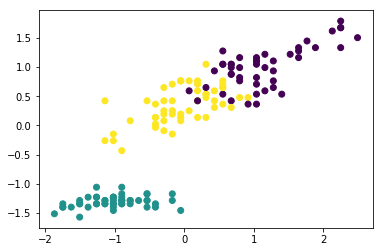

In [174]:
plt.scatter(x[:,0],x[:,2], c = model.labels_)

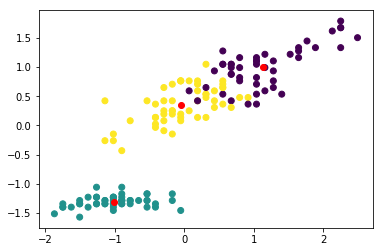

In [177]:
plt.scatter(x[:,0],x[:,2], c = model.labels_)
for i in range(3):
    plt.scatter(model.cluster_centers_[i][0],
                model.cluster_centers_[i][2],
               c='Red')

In [178]:
# K-Means and Cross-Validation

In [180]:
# as before, let's consider a range of k-values...
kvalues = range(1,9)
# initialize the corresponding scores
scores = np.zeros(len(kvalues))

In [181]:
# create and evaluate models...
for k in kvalues:
    model = skc.KMeans(n_clusters = k)
    scores[k-1] = np.mean(skms.cross_val_score(model, x, cv=10))

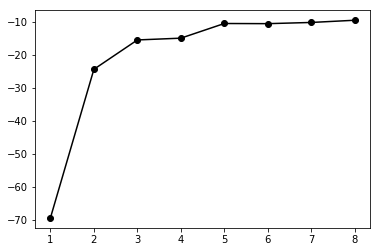

In [182]:
# visualize results...
plt.plot(kvalues,scores, 'ko-')

In [184]:
## OTHER CLUSTERING APPROACHES...
# AGGLOMERATIVE CLUSTERING

In [189]:
# grab some dataset: the so-called "SWISS ROLL"
import sklearn.datasets as skd
x,y = skd.make_swiss_roll(1000, noise=0.4)

In [190]:
# data structure
x.shape

(1000, 3)

In [191]:
x = np.c_[x[:,0], x[:,2]]

In [193]:
x.shape

(1000, 2)

In [196]:
# create the model...
# the connectivity of the points is determined using the kneighbors_graph fn
model = skc.AgglomerativeClustering(n_clusters=3, connectivity=skn.kneighbors_graph(x,30))

In [197]:
model = model.fit(x)

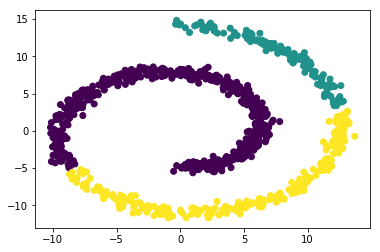

In [198]:
# visualize the classification
plt.scatter(x[:,0],x[:,1], c=model.labels_)